In [89]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [90]:
directory = "Desktop/Topic_modelling/"

In [91]:
files = glob.glob(f"{directory}/*.txt")
files

['Desktop/Topic_modelling/Factiva_Tampon_Tax.txt',
 'Desktop/Topic_modelling/Twitter_Tampon_Tax_Political.txt',
 'Desktop/Topic_modelling/Reddit_Tampon_Tax_Political.txt',
 'Desktop/Topic_modelling/Twitter_Tampon_Tax_All.txt']

In [92]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

In [93]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

In [94]:
obit_titles = [Path(file).stem for file in files]

In [95]:
obit_titles

['Factiva_Tampon_Tax',
 'Twitter_Tampon_Tax_Political',
 'Reddit_Tampon_Tax_Political',
 'Twitter_Tampon_Tax_All']

In [96]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 4
Mean Number of Words per Document: 24044.0
Vocabulary Size: 12996


In [97]:
num_topics = 15

In [98]:
training_data = training_data

In [99]:
#Change to your desired output directory
output_directory_path = 'Desktop/topic-model-output/Factiva/Tampon_tax'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [100]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...
Complete


([['person',
   'extended',
   'elimination',
   'leonard',
   'legalize',
   'drawing',
   'career',
   'weapon',
   'producer',
   'review',
   'impose',
   'two',
   'defending',
   'speed',
   'determining',
   'beach',
   'justin',
   'clinton',
   'critical',
   'surrounding'],
  ['npr',
   'happening',
   'endometriosis',
   'hey',
   'wish',
   'permanent',
   'segment',
   'httpstcojdfh',
   'annanorthtweets',
   'udclaw',
   'winniebrinks',
   'thinxxjww',
   'booth',
   'damn',
   'doesnt',
   'tamp',
   'hour',
   'guy',
   'oakland',
   'bleeding'],
  ['sign',
   'remove',
   'bill',
   'asking',
   'eliminate',
   'end',
   'holiday',
   'gov',
   'panel',
   'without',
   'consider',
   'herald',
   'business',
   'denver',
   'expand',
   'senate',
   'exemption',
   'option',
   'pass',
   'repeal'],
  ['copyright',
   'least',
   'using',
   'goal',
   'whose',
   'attack',
   'minimum',
   'initiative',
   'became',
   'success',
   'maryland',
   'present',
   'cycl

In [101]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['person', 'extended', 'elimination', 'leonard', 'legalize', 'drawing', 'career', 'weapon', 'producer', 'review', 'impose', 'two', 'defending', 'speed', 'determining', 'beach', 'justin', 'clinton', 'critical', 'surrounding']

✨Topic 1✨

['npr', 'happening', 'endometriosis', 'hey', 'wish', 'permanent', 'segment', 'httpstcojdfh', 'annanorthtweets', 'udclaw', 'winniebrinks', 'thinxxjww', 'booth', 'damn', 'doesnt', 'tamp', 'hour', 'guy', 'oakland', 'bleeding']

✨Topic 2✨

['sign', 'remove', 'bill', 'asking', 'eliminate', 'end', 'holiday', 'gov', 'panel', 'without', 'consider', 'herald', 'business', 'denver', 'expand', 'senate', 'exemption', 'option', 'pass', 'repeal']

✨Topic 3✨

['copyright', 'least', 'using', 'goal', 'whose', 'attack', 'minimum', 'initiative', 'became', 'success', 'maryland', 'present', 'cycle', 'continue', 'senator', 'related', 'project', 'reach', 'network', 'feed']

✨Topic 4✨

['politicon', 'diaper', 'fighting', 'httpstcoiz', 'emilysdouglas', 'ask', 'carejan

In [102]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [103]:
topic_distributions[3]

[5.0173145062661895e-06,
 0.09124942440048289,
 0.007823790264129056,
 9.165132466181388e-06,
 0.09854037330342251,
 4.977220952081102e-06,
 4.985007108611898e-06,
 0.5865359204476221,
 4.960801328576155e-06,
 4.9702233552501e-06,
 0.21579490701017434,
 5.625176886239487e-06,
 5.885500845653823e-06,
 4.986230222324362e-06,
 5.011966497861584e-06]

In [104]:
obituary_to_check = "Factiva_Tampon_Tax"

obit_number = obit_titles.index(obituary_to_check)

print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for Factiva_Tampon_Tax

✨Topic 0 ['person', 'extended', 'elimination', 'leonard', 'legalize', 'drawing'] ✨
Probability: 0.022

✨Topic 1 ['npr', 'happening', 'endometriosis', 'hey', 'wish', 'permanent'] ✨
Probability: 0.0

✨Topic 2 ['sign', 'remove', 'bill', 'asking', 'eliminate', 'end'] ✨
Probability: 0.016

✨Topic 3 ['copyright', 'least', 'using', 'goal', 'whose', 'attack'] ✨
Probability: 0.066

✨Topic 4 ['politicon', 'diaper', 'fighting', 'httpstcoiz', 'emilysdouglas', 'ask'] ✨
Probability: 0.0

✨Topic 5 ['susan', 'inequity', 'massachusetts', 'road', 'sentence', 'grdn'] ✨
Probability: 0.016

✨Topic 6 ['teen', 'roughly', 'fix', 'shame', 'undergo', 'solve'] ✨
Probability: 0.018

✨Topic 7 ['httpstco', 'state', 'luxury', 'amazing', 'please', 'jweisswolf'] ✨
Probability: 0.0

✨Topic 8 ['detail', 'publishing', 'compared', 'repeal', 'grown', 'format'] ✨
Probability: 0.015

✨Topic 9 ['someone', 'registration', 'fda', 'discussing', 'ice', 'environmentally'] ✨
Probability: 

In [105]:
obituary_to_check = "Twitter_Tampon_Tax_Political"

obit_number = obit_titles.index(obituary_to_check)

print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for Twitter_Tampon_Tax_Political

✨Topic 0 ['person', 'extended', 'elimination', 'leonard', 'legalize', 'drawing'] ✨
Probability: 0.0

✨Topic 1 ['npr', 'happening', 'endometriosis', 'hey', 'wish', 'permanent'] ✨
Probability: 0.0

✨Topic 2 ['sign', 'remove', 'bill', 'asking', 'eliminate', 'end'] ✨
Probability: 0.003

✨Topic 3 ['copyright', 'least', 'using', 'goal', 'whose', 'attack'] ✨
Probability: 0.002

✨Topic 4 ['politicon', 'diaper', 'fighting', 'httpstcoiz', 'emilysdouglas', 'ask'] ✨
Probability: 0.0

✨Topic 5 ['susan', 'inequity', 'massachusetts', 'road', 'sentence', 'grdn'] ✨
Probability: 0.0

✨Topic 6 ['teen', 'roughly', 'fix', 'shame', 'undergo', 'solve'] ✨
Probability: 0.0

✨Topic 7 ['httpstco', 'state', 'luxury', 'amazing', 'please', 'jweisswolf'] ✨
Probability: 0.868

✨Topic 8 ['detail', 'publishing', 'compared', 'repeal', 'grown', 'format'] ✨
Probability: 0.0

✨Topic 9 ['someone', 'registration', 'fda', 'discussing', 'ice', 'environmentally'] ✨
Probabili

In [106]:
obituary_to_check = "Twitter_Tampon_Tax_All"

obit_number = obit_titles.index(obituary_to_check)

print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for Twitter_Tampon_Tax_All

✨Topic 0 ['person', 'extended', 'elimination', 'leonard', 'legalize', 'drawing'] ✨
Probability: 0.0

✨Topic 1 ['npr', 'happening', 'endometriosis', 'hey', 'wish', 'permanent'] ✨
Probability: 0.091

✨Topic 2 ['sign', 'remove', 'bill', 'asking', 'eliminate', 'end'] ✨
Probability: 0.008

✨Topic 3 ['copyright', 'least', 'using', 'goal', 'whose', 'attack'] ✨
Probability: 0.0

✨Topic 4 ['politicon', 'diaper', 'fighting', 'httpstcoiz', 'emilysdouglas', 'ask'] ✨
Probability: 0.099

✨Topic 5 ['susan', 'inequity', 'massachusetts', 'road', 'sentence', 'grdn'] ✨
Probability: 0.0

✨Topic 6 ['teen', 'roughly', 'fix', 'shame', 'undergo', 'solve'] ✨
Probability: 0.0

✨Topic 7 ['httpstco', 'state', 'luxury', 'amazing', 'please', 'jweisswolf'] ✨
Probability: 0.587

✨Topic 8 ['detail', 'publishing', 'compared', 'repeal', 'grown', 'format'] ✨
Probability: 0.0

✨Topic 9 ['someone', 'registration', 'fda', 'discussing', 'ice', 'environmentally'] ✨
Probability: 

In [107]:
obituary_to_check = "Reddit_Tampon_Tax_Political"

obit_number = obit_titles.index(obituary_to_check)

print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for Reddit_Tampon_Tax_Political

✨Topic 0 ['person', 'extended', 'elimination', 'leonard', 'legalize', 'drawing'] ✨
Probability: 0.0

✨Topic 1 ['npr', 'happening', 'endometriosis', 'hey', 'wish', 'permanent'] ✨
Probability: 0.0

✨Topic 2 ['sign', 'remove', 'bill', 'asking', 'eliminate', 'end'] ✨
Probability: 0.994

✨Topic 3 ['copyright', 'least', 'using', 'goal', 'whose', 'attack'] ✨
Probability: 0.0

✨Topic 4 ['politicon', 'diaper', 'fighting', 'httpstcoiz', 'emilysdouglas', 'ask'] ✨
Probability: 0.0

✨Topic 5 ['susan', 'inequity', 'massachusetts', 'road', 'sentence', 'grdn'] ✨
Probability: 0.0

✨Topic 6 ['teen', 'roughly', 'fix', 'shame', 'undergo', 'solve'] ✨
Probability: 0.0

✨Topic 7 ['httpstco', 'state', 'luxury', 'amazing', 'please', 'jweisswolf'] ✨
Probability: 0.004

✨Topic 8 ['detail', 'publishing', 'compared', 'repeal', 'grown', 'format'] ✨
Probability: 0.0

✨Topic 9 ['someone', 'registration', 'fda', 'discussing', 'ice', 'environmentally'] ✨
Probability:

In [108]:
target_labels = ['Factiva_Tampon_Tax',
 'Twitter_Tampon_Tax_Political',
 'Reddit_Tampon_Tax_Political',
 'Twitter_Tampon_Tax_All']

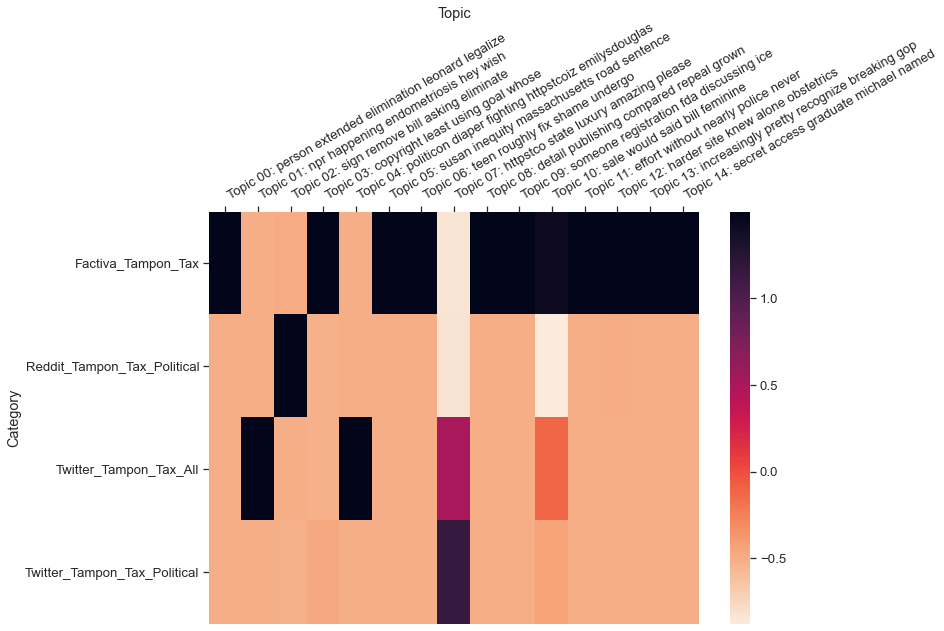

In [109]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (13, 9)
                                     )